### Zadanie domowe 3

Proszę skonstruować klasyfikator oparty o głęboką sieć neuronową dla danych CIFAR-10. 

Do konstrukcji klasyfikatora należy użyć zbioru treningowego danych CIFAR-10 a zbioru testowego CIFAR-10 jako zbioru walidacyjnego do oceny dokładności aktualnego modelu po każdej epoce porcedury trenowania. 

Rozwiązaniem powinien być plik .ipynb z kodem w Pythonie wczytującym dane, dokonującym ewentualnych przekształceń danych, trenującym opisany klasyfikator i generującym wykresy dokładności modelu zarówno dla danych treningowych jak i walidacyjnych uzyskanych po każdej epoce trenowania. Procedura trenowania powinna wykorzystywać "patient early stopping" i zapisywać parametry najlepszego modelu do pliku. Po wytrenowaniu, zapisany model powinien zostać wczytany z zapisanego pliku i zastosowany do danych walidacyjnych celem obliczenia i wypisania dokładności osiągniętej dla tych danych.  

Wytrenowany model powinnien osiągać dokładność na danych walidacyjnych wynoszącą co najmniej 70%.

***Wskazówki:*** 
- Zastanowić się jaki powinien być "input shape".
- Model powinien być głęboką siecią neuronową, jednak jej architektura jest pozostawiona Państwa inwencji.

***Termin oddania***: 9 czerwca 2023 (za 3 tygodnie of daty umieszczenia na platformie Moodle)

**Propozycja do rozważenia**

Jeżeli Państwo się zgodzą, możemy zorganizować mały konkurs. Osoby chcące wziąć w nim udział będą dodatkowo proszone o zachowanie pliku .hd5 z jednym wytrenowanym modelem. Po ustaleniu jakiegoś dodatkowego terminu pasującego uszestnikom konkursu, komisyjnie wczytamy Państwa zapisane modele i uruchomimy na zbiorze testowym CIFAR-10. Zwycięskim modelem będzie ten, który osiągnie maksymalną dokładność na tym zbiorze danych. Nagrodą dla zwycięzcy(-ów) będą 3 dodatkowe punkty do oceny końcowej. Szczegóły ustalimy na następnych zajęciach.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [3]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [4]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

In [5]:
x_train, x_test = x_train / 255, x_test / 255

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [6]:
datagen.fit(x_train)

In [7]:
model = tf.keras.models.Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                        

In [9]:
batch_size = 128

train_generator = datagen.flow(x_train, y_train, batch_size=batch_size)

steps_per_epoch = len(x_train) // batch_size

In [10]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=50, restore_best_weights=True)

checkpoint_callback = ModelCheckpoint(
    'best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=False,
    mode='max',
    verbose=1
)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=500, 
                    validation_data=(x_test, y_test), callbacks=[early_stopping, checkpoint_callback])

Epoch 1/500
390/390 [==============================] - ETA: 0s - loss: 1.8879 - accuracy: 0.3408
Epoch 1: val_accuracy improved from -inf to 0.18250, saving model to best_model.h5
390/390 [==============================] - 48s 87ms/step - loss: 1.8879 - accuracy: 0.3408 - val_loss: 2.4081 - val_accuracy: 0.1825
Epoch 2/500
390/390 [==============================] - ETA: 0s - loss: 1.3775 - accuracy: 0.5112
Epoch 2: val_accuracy improved from 0.18250 to 0.57680, saving model to best_model.h5
390/390 [==============================] - 33s 85ms/step - loss: 1.3775 - accuracy: 0.5112 - val_loss: 1.2633 - val_accuracy: 0.5768
Epoch 3/500
390/390 [==============================] - ETA: 0s - loss: 1.1523 - accuracy: 0.6058
Epoch 3: val_accuracy improved from 0.57680 to 0.65740, saving model to best_model.h5
390/390 [==============================] - 32s 81ms/step - loss: 1.1523 - accuracy: 0.6058 - val_loss: 1.0066 - val_accuracy: 0.6574
Epoch 4/500
390/390 [==============================] - 

313/313 - 1s - loss: 0.3899 - accuracy: 0.9087 - 1s/epoch - 4ms/step
0.9086999893188477


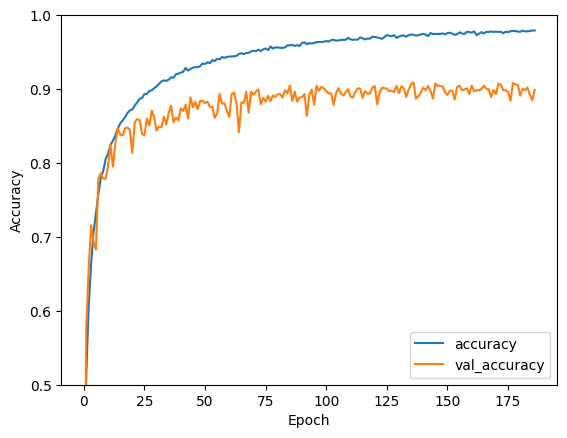

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print(test_acc)

In [12]:
model_from_file = tf.keras.models.load_model('best_model.h5')

test_loss, test_acc = model_from_file.evaluate(x_test,  y_test, verbose=2)

print(test_acc)

313/313 - 1s - loss: 0.3899 - accuracy: 0.9087 - 1s/epoch - 4ms/step
0.9086999893188477
